## SI 670 Applied Machine Learning, Week 6: Naive Bayes, Pipeline, High Dimension, Density Estimation.

In [0]:
# # run this cell if you are using Colab

# !rm -rf fruit_data_with_colors.txt
# !rm -rf adspy_shared_utilities.py
# !rm -rf CommViolPredUnnormalizedData.txt

# import io

# from google.colab import files as colab_files
# uploaded = colab_files.upload()
# files = {'fruit_data_with_colors.txt': io.BytesIO(uploaded['fruit_data_with_colors.txt'])}

# # upload 'fruit_data_with_colors.txt', 'adspy_shared_utilities.py', and 'CommViolPredUnnormalizedData.txt'

In [0]:
# run this cell if you are using Jupyter
files = {'fruit_data_with_colors.txt': 'fruit_data_with_colors.txt'}

## Prepare the dataset

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer, load_boston
from adspy_shared_utilities import load_crime_dataset

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# fruits dataset
fruits = pd.read_table(files['fruit_data_with_colors.txt'])

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

# synthetic dataset for simple regression
from sklearn.datasets import make_regression
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)

# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
X_F1, y_F1 = make_friedman1(n_samples = 100, n_features = 7,
                           random_state=0)

# synthetic dataset for classification (binary)

X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

# more difficult synthetic dataset for classification (binary)
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)
y_D2 = y_D2 % 2

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Boston housing dataset
boston = load_boston()
X_boston, y_boston = load_boston(return_X_y = True)

# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset()

## Naive Bayes

### GaussianNB

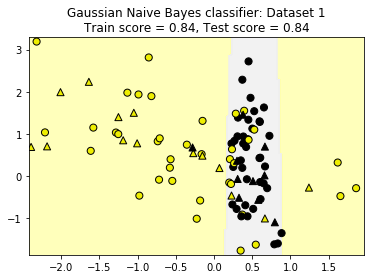

In [0]:
from sklearn.naive_bayes import GaussianNB
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

nbclf = GaussianNB().fit(X_train, y_train)
plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test,
                                 'Gaussian Naive Bayes classifier: Dataset 1')

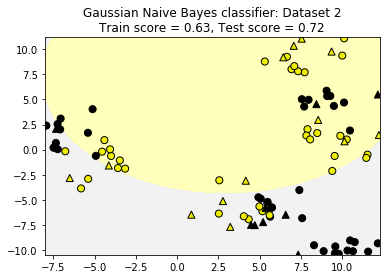

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                   random_state=0)

nbclf = GaussianNB().fit(X_train, y_train)
plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test,
                                 'Gaussian Naive Bayes classifier: Dataset 2')

In [0]:
# Apply GaussianNB on the cancer dataset
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

nbclf = GaussianNB().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of GaussianNB classifier on training set: {:.2f}'
     .format(nbclf.score(X_train, y_train)))
print('Accuracy of GaussianNB classifier on test set: {:.2f}'
     .format(nbclf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of GaussianNB classifier on training set: 0.95
Accuracy of GaussianNB classifier on test set: 0.94


### (Exercise) Calculate the unnormalized posterior probability of a naive Bayes classifier

Suppose you have a dataset with 2 binary features $X_1, X_2$ and a binary label $Y$. All these binary variables take value either 0 or 1.

Based on the dataset, you know 

$p(Y=0) = 0.01$, $p(X_1=0 | Y=0) = 0.7$, $p(X_1=0 | Y=1) = 0.2$, $p(X_2=0 | Y=0) = 0.8$, $p(X_2=0 | Y=1) = 0.1$. 

Suppose you have a Bernoulli naive Bayes classifier, please calculate the unnormalized posterior probability $\hat{p}(Y=1 | X) = p(X | Y=1) p(Y=1)$ and $\hat{p}(Y=0 | X) = p(X | Y=0) p(Y=0)$ of the following data points.

#### (1) $X = (0, 0)$

Write your answer here: 



#### (2) $X = (1, 0)$

Write your answer here: 


## Pipeline

Sequentially apply a list of transforms and a final estimator. Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement fit and transform methods. The final estimator only needs to implement fit. The transformers in the pipeline can be cached using `memory` argument.

The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters. For this, it enables setting parameters of the various steps using their names and the parameter name separated by a ‘__’, as in the example below. A step’s estimator may be replaced entirely by setting the parameter with its name to another estimator, or a transformer removed by setting it to ‘passthrough’ or `None`.

### Construct a pipeline

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
components = [('scaler', MinMaxScaler()), ('clf', SVC())]
pipe = Pipeline(components)
print(pipe)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('clf',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

svm = SVC().fit(X_train, y_train)
print("svm without scaler score: %.3f" % svm.score(X_test, y_test))

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm2 = SVC().fit(X_train_scaled, y_train)
print("svm with scaler score: %.3f" % svm2.score(X_test_scaled, y_test))

pipe.fit(X_train, y_train)
print("pipeline score: %.3f" % pipe.score(X_test, y_test))

svm without scaler score: 0.629
svm with scaler score: 0.951
pipeline score: 0.951


#### (Exercise) Construct a pipeline with StandardScaler and LogisticRegression on the cancer data

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

%%% Your code here


pipeline score: 0.958


### CoulumnTransformer

#### One-hot encoding mixed type data

In [0]:
# Data
import pandas as pd
import numpy as np
X_numeric = np.array([[5., -2., -4.],
                      [3., 4., -2.]])
X_categorical = np.array([['a'],
                          ['b']])
X = pd.concat([pd.DataFrame(X_numeric), pd.DataFrame(X_categorical)], axis=1)
X

,0,1,2,0
0,5.0,-2.0,-4.0,a
1,3.0,4.0,-2.0,b


In [0]:
# One-hot encoding with ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(
    transformers=[('one-hot', OneHotEncoder(), [3])], remainder='passthrough')

# note the order of the features has changed
ct.fit_transform(X)  

array([[ 1.,  0.,  5., -2., -4.],
       [ 0.,  1.,  3.,  4., -2.]])

### (Exercise) Build a pipeline that first imputes missing data with mean values, then converts the categorical features into one-hot encoding, and finally fit a Ridge regression

Use the `(X_missing, y_missing)` data.

Hint: the columns 2, 3, and 5 contain missing values; the column 8 is a categorical feature and all other columns are numerical features.

In [0]:
def get_results(X_full, y_full, missing_indices):
    rng = np.random.RandomState(0)

    n_samples = X_full.shape[0]

    # Add missing values in 25% of the lines
    missing_rate = 0.25
    n_missing_samples = int(np.floor(n_samples * missing_rate))
    missing_samples = np.hstack((np.zeros(n_samples - n_missing_samples,
                                          dtype=np.bool),
                                 np.ones(n_missing_samples,
                                         dtype=np.bool)))
    rng.shuffle(missing_samples)
    missing_features = rng.choice(missing_indices, size=(n_missing_samples,))
    X_missing = X_full.copy()
    X_missing[np.where(missing_samples)[0], missing_features] = np.nan
    y_missing = y_full.copy()
    
    return X_missing, y_missing

X_missing, y_missing = get_results(X_boston, y_boston, [2, 3, 5])

X_train, X_test, y_train, y_test = train_test_split(X_missing, y_missing, random_state=0)

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge

%%% Your code here.



pipeline score: 0.667


## High Dimensions

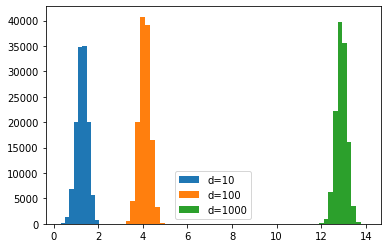

In [0]:
rng = np.random.RandomState(0)

n = 500

# generate n random samples uniformly from the unit hypercube
for d in [10, 100, 1000]:
    samples = rng.uniform(size=(n, d))
    distances = []
    for i in range(len(samples) - 1):
        for j in range(i + 1, len(samples)):
            distances.append(np.linalg.norm(samples[i] - samples[j]))
    plt.hist(distances, label="d={}".format(d))
    plt.legend()

## Density Estimation

In [0]:
from sklearn.neighbors.kde import KernelDensity
import numpy as np
X = np.array([[-1], [-1], [-1], [-2], [1], [1], [2]])
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X)
np.exp(kde.score_samples(X))

array([0.85487738, 0.85487738, 0.85487738, 0.28496196, 0.56991861,
       0.56991861, 0.2849609 ])

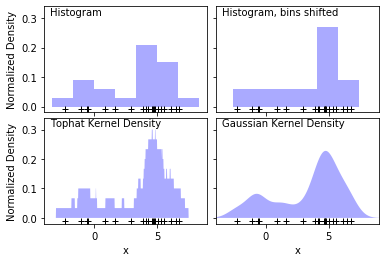

In [0]:
# Based on an example by Jake Vanderplas <jakevdp@cs.washington.edu>
#
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

#----------------------------------------------------------------------
# Plot the progression of histograms to kernels
np.random.seed(1)
N = 20
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
bins = np.linspace(-5, 10, 10)

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.05, wspace=0.05)

# histogram 1
ax[0, 0].hist(X[:, 0], bins=bins, fc='#AAAAFF', density=True)
ax[0, 0].text(-3.5, 0.31, "Histogram")

# histogram 2
ax[0, 1].hist(X[:, 0], bins=bins + 0.75, fc='#AAAAFF', density=True)
ax[0, 1].text(-3.5, 0.31, "Histogram, bins shifted")

# tophat KDE
kde = KernelDensity(kernel='tophat', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 0].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[1, 0].text(-3.5, 0.31, "Tophat Kernel Density")

# Gaussian KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 1].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[1, 1].text(-3.5, 0.31, "Gaussian Kernel Density")

for axi in ax.ravel():
    axi.plot(X[:, 0], np.full(X.shape[0], -0.01), '+k')
    axi.set_xlim(-4, 9)
    axi.set_ylim(-0.02, 0.34)

for axi in ax[:, 0]:
    axi.set_ylabel('Normalized Density')

for axi in ax[1, :]:
    axi.set_xlabel('x')

Text(0.5, 1.0, 'Available Kernels')

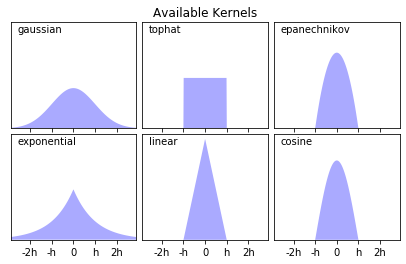

In [0]:
#----------------------------------------------------------------------
# Based on an example by Jake Vanderplas <jakevdp@cs.washington.edu>
# Plot all available kernels
X_plot = np.linspace(-6, 6, 1000)[:, None]
X_src = np.zeros((1, 1))

fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
fig.subplots_adjust(left=0.05, right=0.95, hspace=0.05, wspace=0.05)
def format_func(x, loc):
    if x == 0:
        return '0'
    elif x == 1:
        return 'h'
    elif x == -1:
        return '-h'
    else:
        return '%ih' % x

for i, kernel in enumerate(['gaussian', 'tophat', 'epanechnikov',
                            'exponential', 'linear', 'cosine']):
    axi = ax.ravel()[i]
    log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(X_plot)
    axi.fill(X_plot[:, 0], np.exp(log_dens), '-k', fc='#AAAAFF')
    axi.text(-2.6, 0.95, kernel)

    axi.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    axi.xaxis.set_major_locator(plt.MultipleLocator(1))
    axi.yaxis.set_major_locator(plt.NullLocator())

    axi.set_ylim(0, 1.05)
    axi.set_xlim(-2.9, 2.9)

ax[0, 1].set_title('Available Kernels')

 - computing KDE in spherical coordinates
 - plot coastlines from coverage
 - computing KDE in spherical coordinates
 - plot coastlines from coverage


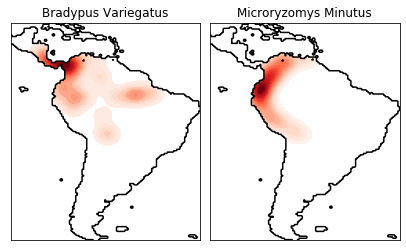

In [0]:
# Author: Jake Vanderplas <jakevdp@cs.washington.edu>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_species_distributions
from sklearn.datasets.species_distributions import construct_grids
from sklearn.neighbors import KernelDensity

# if basemap is available, we'll use it.
# otherwise, we'll improvise later...
try:
    from mpl_toolkits.basemap import Basemap
    basemap = True
except ImportError:
    basemap = False

# Get matrices/arrays of species IDs and locations
data = fetch_species_distributions(data_home='./')
species_names = ['Bradypus Variegatus', 'Microryzomys Minutus']

Xtrain = np.vstack([data['train']['dd lat'],
                    data['train']['dd long']]).T
ytrain = np.array([d.decode('ascii').startswith('micro')
                  for d in data['train']['species']], dtype='int')
Xtrain *= np.pi / 180.  # Convert lat/long to radians

# Set up the data grid for the contour plot
xgrid, ygrid = construct_grids(data)
X, Y = np.meshgrid(xgrid[::5], ygrid[::5][::-1])
land_reference = data.coverages[6][::5, ::5]
land_mask = (land_reference > -9999).ravel()

xy = np.vstack([Y.ravel(), X.ravel()]).T
xy = xy[land_mask]
xy *= np.pi / 180.

# Plot map of South America with distributions of each species
fig = plt.figure()
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05)

for i in range(2):
    plt.subplot(1, 2, i + 1)

    # construct a kernel density estimate of the distribution
    print(" - computing KDE in spherical coordinates")
    kde = KernelDensity(bandwidth=0.04, metric='haversine',
                        kernel='gaussian', algorithm='ball_tree')
    kde.fit(Xtrain[ytrain == i])

    # evaluate only on the land: -9999 indicates ocean
    Z = np.full(land_mask.shape[0], -9999, dtype='int')
    Z[land_mask] = np.exp(kde.score_samples(xy))
    Z = Z.reshape(X.shape)

    # plot contours of the density
    levels = np.linspace(0, Z.max(), 25)
    plt.contourf(X, Y, Z, levels=levels, cmap=plt.cm.Reds)

    if basemap:
        print(" - plot coastlines using basemap")
        m = Basemap(projection='cyl', llcrnrlat=Y.min(),
                    urcrnrlat=Y.max(), llcrnrlon=X.min(),
                    urcrnrlon=X.max(), resolution='c')
        m.drawcoastlines()
        m.drawcountries()
    else:
        print(" - plot coastlines from coverage")
        plt.contour(X, Y, land_reference,
                    levels=[-9998], colors="k",
                    linestyles="solid")
        plt.xticks([])
        plt.yticks([])

    plt.title(species_names[i])

plt.show()

## XGBoost

In [ ]:
%pip install xgboost
#To use xgboost, you may need to install libomp on your system.
#you can refer to about how to install it: https://xgboost.readthedocs.io/en/latest/build.html

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

#import the Boston Housing dataset and store it in a variable called boston
boston = load_boston()
print(boston.keys())
print(boston.data.shape)

data = pd.DataFrame(boston.data)
data.columns = boston.feature_names

#get the y label, i.e., price 
data['PRICE'] = boston.target

#get the X, y data
X, y = data.iloc[:,:-1],data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#data_dmatrix = xgb.DMatrix(data=X,label=y)
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))

print("RMSE: %f" % (rmse))